In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('refined_drug_data.csv', sep=';')
# all NaN to empty string
df = df.fillna('')

data = df.copy()
# make an array
data['drug_names'] = data[['Drug_1', 'Drug_2', 'Drug_3', 'Drug_4', 'Drug_5', 'Drug_6', 'Drug_7', 'Drug_8']].values.tolist()
# remove empty strings
data['drug_names'] = data['drug_names'].apply(lambda x: [i for i in x if i])
data = data.drop(['Drug_1', 'Drug_2', 'Drug_3', 'Drug_4', 'Drug_5', 'Drug_6', 'Drug_7', 'Drug_8'], axis=1)
data

# sort by freq 
sorted_drug = data['drug_names'].explode().value_counts().index
sorted_drug


Index(['LISINOPRIL', 'SIMVASTATIN', 'METOPROLOL', 'METFORMIN', 'LEVOTHYROXINE',
       'AMLODIPINE', 'HYDROCHLOROTHIAZIDE', 'FUROSEMIDE', 'ATORVASTATIN',
       'OMEPRAZOLE', 'ATENOLOL', 'GLIPIZIDE', 'ALBUTEROL', 'WARFARIN',
       'ASPIRIN', 'POTASSIUM CHLORIDE', 'ESOMEPRAZOLE', 'CLOPIDOGREL',
       'CARVEDILOL', 'VALSARTAN', 'LOSARTAN', 'GABAPENTIN', 'ROSUVASTATIN',
       'LOVASTATIN', 'PIOGLITAZONE', 'PRAVASTATIN', 'RANITIDINE', 'TRAMADOL',
       'IBUPROFEN', 'INSULIN GLARGINE', 'CITALOPRAM', 'ALENDRONATE',
       'ALLOPURINOL', 'MONTELUKAST', 'FEXOFENADINE', 'TAMSULOSIN', 'ZOLPIDEM',
       'SERTRALINE', 'FLUTICASONE NASAL', 'PREDNISONE'],
      dtype='object')

In [238]:
# data['counts'] = data['drug_names'].apply(lambda x: len(x))
# # group by counts
# data = data.groupby('counts').count()
# data

In [3]:
dosages = pd.read_csv('drugs_dosing.csv', sep=';')
all_40_drugs = dosages['Drug Names'].values.tolist()
# all_40_drugs

In [4]:
# heatmap of drug combinations
heatmap = np.zeros((40, 40))
for combination in data['drug_names'].to_list():
    for drug in combination:
        for drug2 in combination:
            heatmap[all_40_drugs.index(drug), all_40_drugs.index(drug2)] += 1
# diagonal is 0
# heatmap[range(40), range(40)] = np.nan
# heatmap[heatmap == 0] = np.nan

# heatmap[np.argsort(clusters)][:, np.argsort(clusters)]
#sort by diagonal values
diagonal = np.diag(heatmap)
sorted_indices_1 = np.argsort(diagonal)
sorted_by_freq_heatmap = heatmap[sorted_indices_1][:, sorted_indices_1]

In [5]:
# sort heatmap so the most frequent are on the diagonal on the center and the least frequent are on the edges of diagonal
sorted_new = np.zeros((40, 40))
diagonal = np.diag(sorted_by_freq_heatmap)
sorted_center_diagonal = np.zeros_like(diagonal)
sorted_indices = np.zeros_like(diagonal)

# frequent to the center
for ind in range(0, 40, 2):
    i = ind // 2
    # print(i, 19-i, -2-ind, 20+i,-1-ind )
    sorted_center_diagonal[19-i] = diagonal[-2-ind]
    sorted_center_diagonal[20+i] = diagonal[-1-ind]
    sorted_indices[19-i] = 38-ind
    sorted_indices[20+i] = 39-ind
# sorted_indices = np.argsort(sorted_center_diagonal)
sorted_indices = sorted_indices.astype(int)
sorted_new = sorted_by_freq_heatmap[sorted_indices][:, sorted_indices]

In [7]:
diagonal

array([ 28.,  29.,  32.,  32.,  32.,  33.,  34.,  39.,  42.,  42.,  42.,
        43.,  46.,  48.,  48.,  50.,  52.,  54.,  54.,  55.,  62.,  63.,
        65.,  65.,  72.,  75.,  81.,  82.,  98., 123., 127., 133., 133.,
       157., 159., 170., 215., 223., 270., 294.])

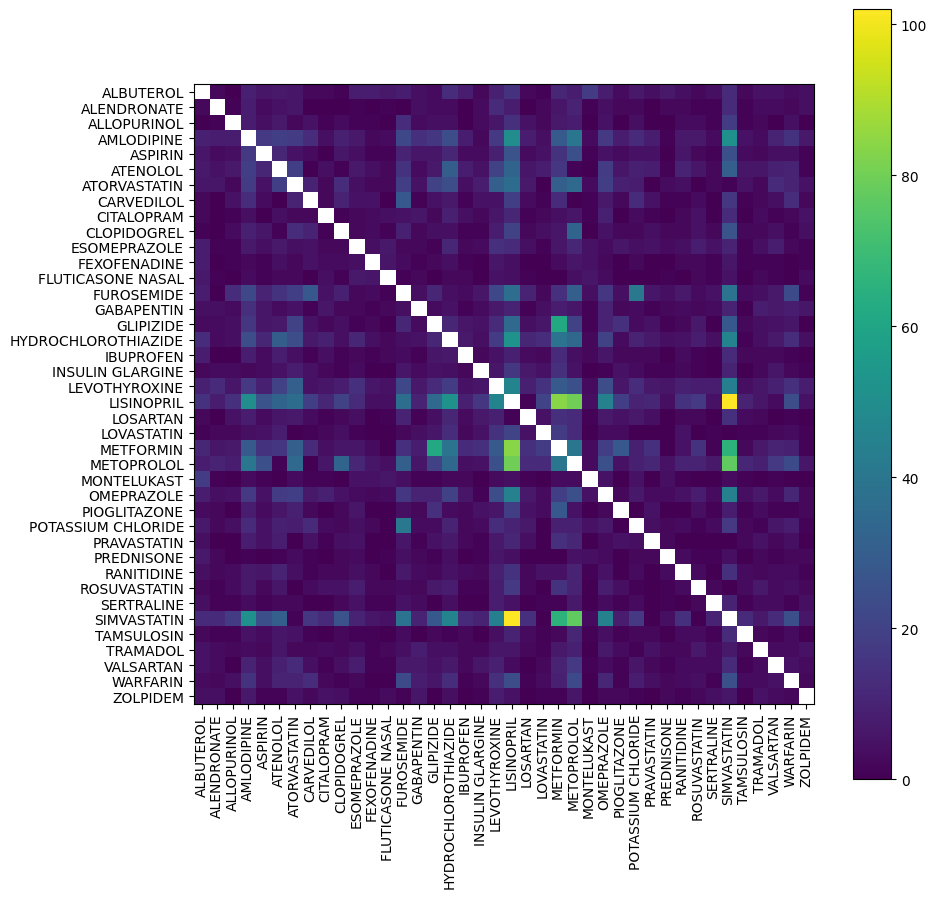

In [6]:
# heatmap_to_show = sorted_new.copy()
heatmap_to_show = heatmap.copy()

plt.figure(figsize=(10, 10))
heatmap_to_show[range(40), range(40)] = np.nan
plt.imshow(heatmap_to_show, cmap='viridis')
plt.colorbar()

plt.xticks(np.arange(40), all_40_drugs, rotation=90)
plt.yticks(np.arange(40), all_40_drugs)
plt.show()

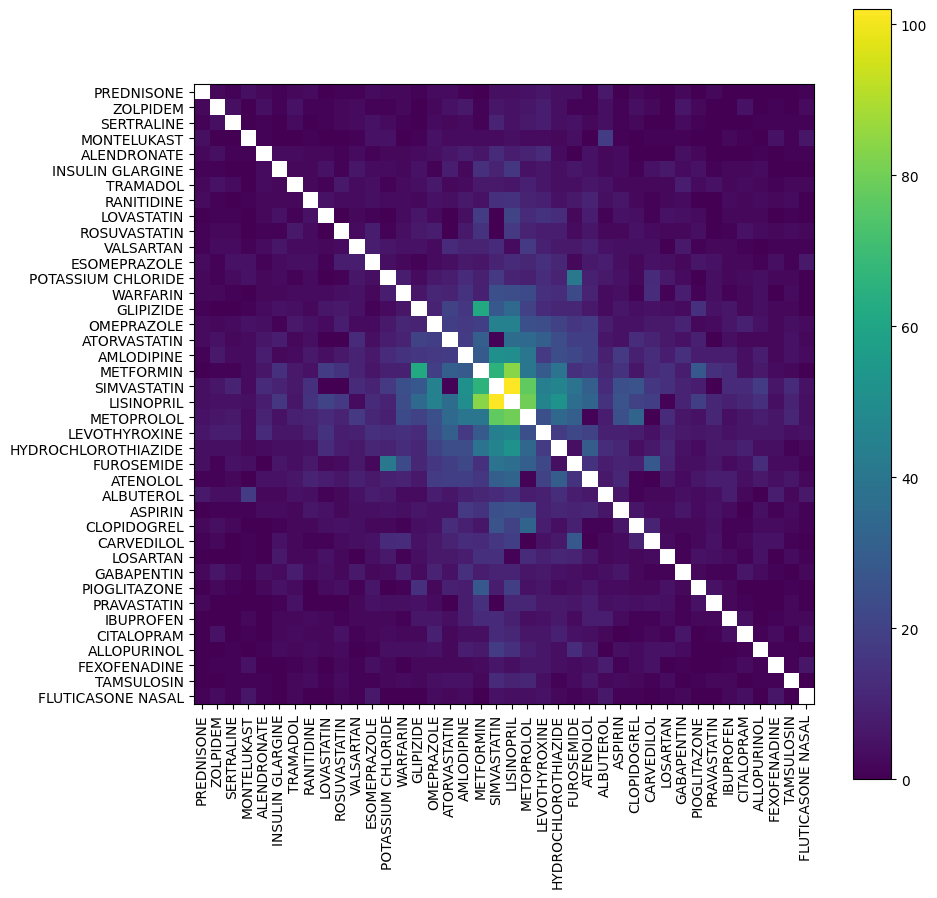

In [56]:
heatmap_to_show = sorted_new.copy()

plt.figure(figsize=(10, 10))
heatmap_to_show[range(40), range(40)] = np.nan
plt.imshow(heatmap_to_show, cmap='viridis')
plt.colorbar()

indices_to_show = sorted_indices.astype(int).tolist()

plt.xticks(np.arange(40), np.array(all_40_drugs)[sorted_indices_1][indices_to_show], rotation=90)
plt.yticks(np.arange(40), np.array(all_40_drugs)[sorted_indices_1][indices_to_show])
plt.show()



In [68]:
# from sklearn.cluster import KMeans

# n_clusters = 9  # Example number of clusters
# kmeans = KMeans(n_clusters=n_clusters)
# clusters = kmeans.fit_predict(heatmap)

# # # Define grid positions (you can also consider making clusters of close positions)
# grid_positions = [(i, j) for i in range(6) for j in range(7)]
# # # Assign positions based on clusters
# cluster_positions = {i: [] for i in range(n_clusters)}

# for idx, cluster in enumerate(clusters):
#     cluster_positions[cluster].append(idx)
# print(cluster_positions)
# # placement = {}
# # for cluster, meds in cluster_positions.items():
# #     for med in meds:
# #         if grid_positions:
# #             placement[med] = grid_positions.pop(0)

# print("Medication Placement by Cluster:", placement)
# print("Cluster Centers:", kmeans.cluster_centers_)

# # Plot clusters in 2d
# plt.figure(figsize=(10, 10))
# plt.scatter(heatmap[:, 0], heatmap[:, 1], c=clusters, cmap='viridis')


In [11]:
from sklearn.manifold import MDS
from sklearn.manifold import TSNE

# force-directed" layout algorithm

# Your frequency matrix (replace this with your actual data)
frequency_matrix = heatmap
# nan to 0
frequency_matrix = np.nan_to_num(frequency_matrix)
frequency_matrix[frequency_matrix == 0] = 0.1

# Compute the distance matrix (inverse of frequencies)
# distance_matrix = 1/frequency_matrix
distance_matrix = 300 - frequency_matrix
distance_matrix = distance_matrix / distance_matrix.max()

# Apply MDS to obtain 2D coordinates (random init of centers)
mds = MDS(n_components=2, n_init=20, max_iter=2000, dissimilarity='precomputed')
coordinates = mds.fit_transform(distance_matrix)

# Apply t-SNE to obtain 2D coordinates
# tsne = TSNE(n_components=2, perplexity=10, n_iter=3000)
# coordinates_tsne = tsne.fit_transform(distance_matrix)

# print(coordinates)



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [10]:
mds = MDS(n_components=1, n_init=20, max_iter=2000, dissimilarity='precomputed')
coordinates_1d = mds.fit_transform(distance_matrix)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [7]:
# CUSTOM
from scipy.optimize import minimize


def mds_objective(coords, distances, penalty_weight):
    coords = coords.reshape(-1, 2)
    center = np.mean(coords, axis=0)
    stress = 0 # how much the distances are off
    for i in range(len(coords)):
        for j in range(i + 1, len(coords)):
            # calc distance between points in 2d
            d_ij = np.linalg.norm(coords[i] - coords[j])
            stress += (d_ij - distances[i, j]) ** 2
    penalty = penalty_weight * np.sum(np.linalg.norm(coords - center, axis=1) ** 2)
    return stress + penalty

initial_coords_flat = coordinates.flatten()
# print(initial_coords_flat)
penalty_weight = -10

# Minimize the custom stress function
result = minimize(mds_objective, initial_coords_flat, args=(distance_matrix, penalty_weight), method='L-BFGS-B')
# print(result.x)
final_coords = result.x.reshape(-1, 2)
plt.figure(figsize=(8, 6))
plt.scatter(final_coords[:, 0], final_coords[:, 1], marker='o')

# Annotate points
# for i, fruit in enumerate(all_40_drugs):
    # plt.text(final_coords[i, 0], final_coords[i, 1], all_40_drugs)

plt.title('.')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.grid(True)
plt.show()

NameError: name 'coordinates' is not defined

In [12]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
for i, txt in enumerate(all_40_drugs):
    # if txt == medication:
    #     fig.add_trace(go.Scatter(x=[coordinates[i, 0]], y=[coordinates[i, 1]], mode='markers+text', text=txt, textposition='top center', marker=dict(color='red')))
    # fig.add_trace(go.Scatter(x=[coordinates_tsne[i, 0]], y=[coordinates_tsne[i, 1]], mode='markers+text', text=txt, textposition='top center'))
    fig.add_trace(go.Scatter(x=[coordinates[i, 0]], y=[coordinates[i, 1]], mode='markers+text', text=txt, textposition='top center'))
    # fig.add_trace(go.Scatter(x=[final_coords[i, 0]], y=[final_coords[i, 1]], mode='markers+text', text=txt, textposition='top center'))

    # fig.add_trace(go.Scatter(x=[coordinates[i, 0]], y=[0], mode='markers+text', text=txt, textposition='top center'))
fig.show()

fig = go.Figure()
for i, txt in enumerate(all_40_drugs):
    # fig.add_trace(go.Scatter(x=[coordinates_tsne[i, 0]], y=[coordinates_tsne[i, 1]], mode='markers+text', text=txt, textposition='top center'))
    # fig.add_trace(go.Scatter(x=[coordinates[i, 0]], y=[coordinates[i, 1]], mode='markers+text', text=txt, textposition='top center'))
    fig.add_trace(go.Scatter(x=[final_coords[i, 0]], y=[final_coords[i, 1]], mode='markers+text', text=txt, textposition='top center'))

    # fig.add_trace(go.Scatter(x=[coordinates[i, 0]], y=[0], mode='markers+text', text=txt, textposition='top center'))
fig.show()

fig = go.Figure()
for i, txt in enumerate(all_40_drugs):
    # fig.add_trace(go.Scatter(x=[coordinates_tsne[i, 0]], y=[coordinates_tsne[i, 1]], mode='markers+text', text=txt, textposition='top center'))
    # fig.add_trace(go.Scatter(x=[coordinates[i, 0]], y=[coordinates[i, 1]], mode='markers+text', text=txt, textposition='top center'))
    # fig.add_trace(go.Scatter(x=[final_coords[i, 0]], y=[final_coords[i, 1]], mode='markers+text', text=txt, textposition='top center'))

    fig.add_trace(go.Scatter(x=[coordinates_1d[i, 0]], y=[0], mode='markers+text', text=txt, textposition='top center'))
fig.show()

NameError: name 'final_coords' is not defined

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 0 0 2 0 2 2 0 0 0 0 0 0 2 0 0 2 0 0 1 3 0 0 3 1 0 2 0 0 0 0 0 0 0 1 0 0
 0 0 0]


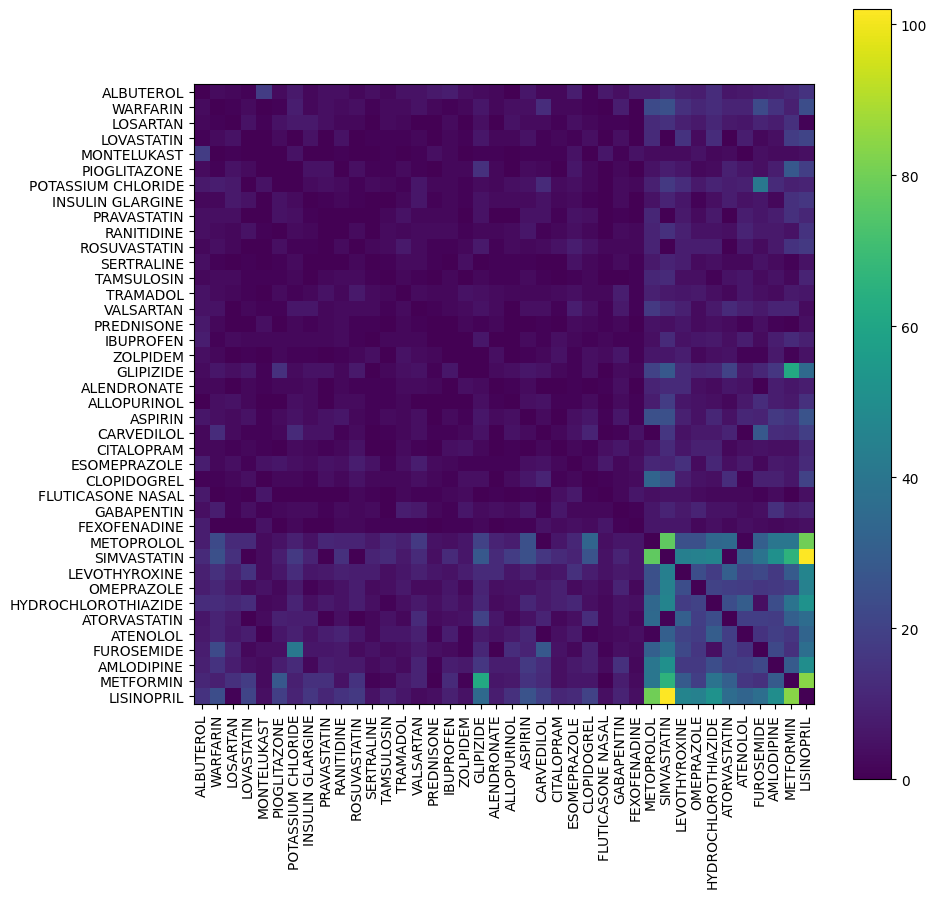

In [22]:
# clustering of drugs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(heatmap)
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
clusters = kmeans.predict(X)

print(clusters)

plt.figure(figsize=(10, 10))
plt.imshow(heatmap[np.argsort(clusters)][:, np.argsort(clusters)], cmap='viridis')
plt.colorbar()
plt.xticks(np.arange(40), np.array(all_40_drugs)[np.argsort(clusters)], rotation=90)
plt.yticks(np.arange(40), np.array(all_40_drugs)[np.argsort(clusters)])
plt.show()

### 2 - combinations freq

In [174]:
# plot a boxplot of most frequent of pairs of drugs
from collections import Counter
from itertools import combinations

drug_pairs = Counter()
for combination in data['drug_names'].to_list():
    for pair in combinations(combination, 2):
        drug_pairs[pair] += 1
drug_pairs = drug_pairs.most_common(250)

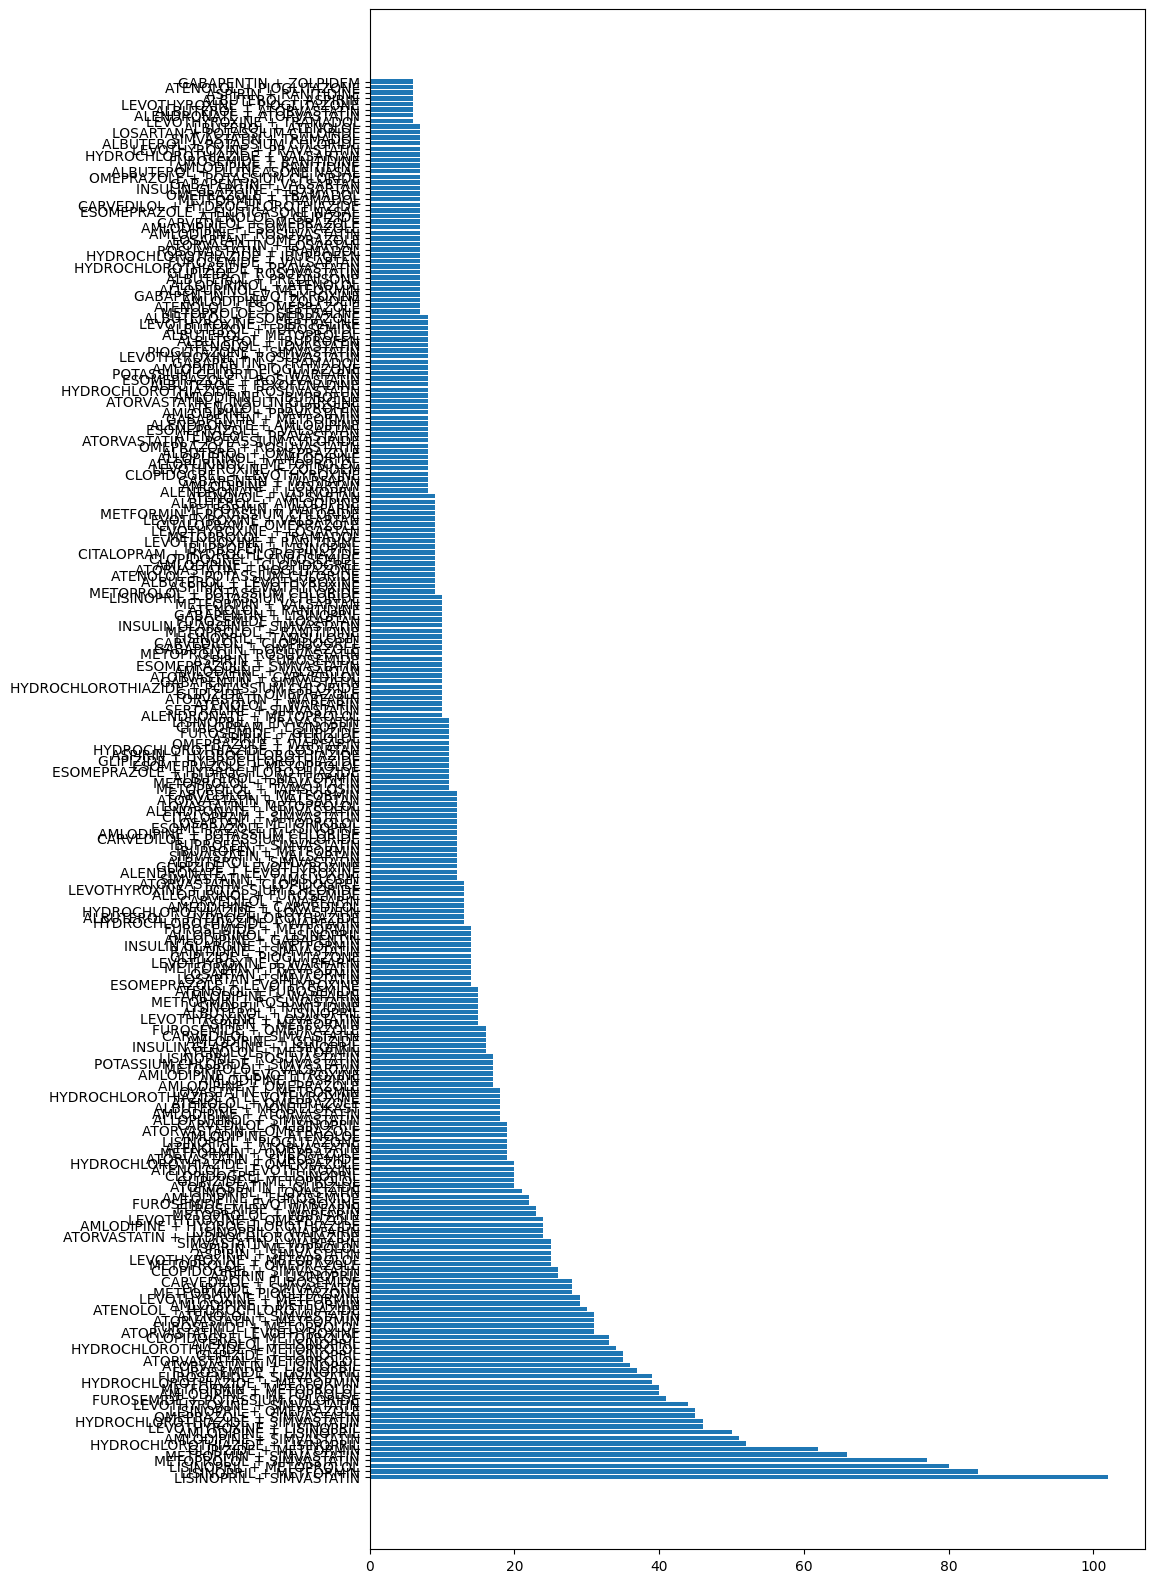

In [175]:
# show a bar plot
plt.figure(figsize=(10, 20))
plt.barh([f'{pair[0]} + {pair[1]}' for pair, _ in drug_pairs], [count for _, count in drug_pairs])
plt.show()

### 3 - combinations frequency

2383


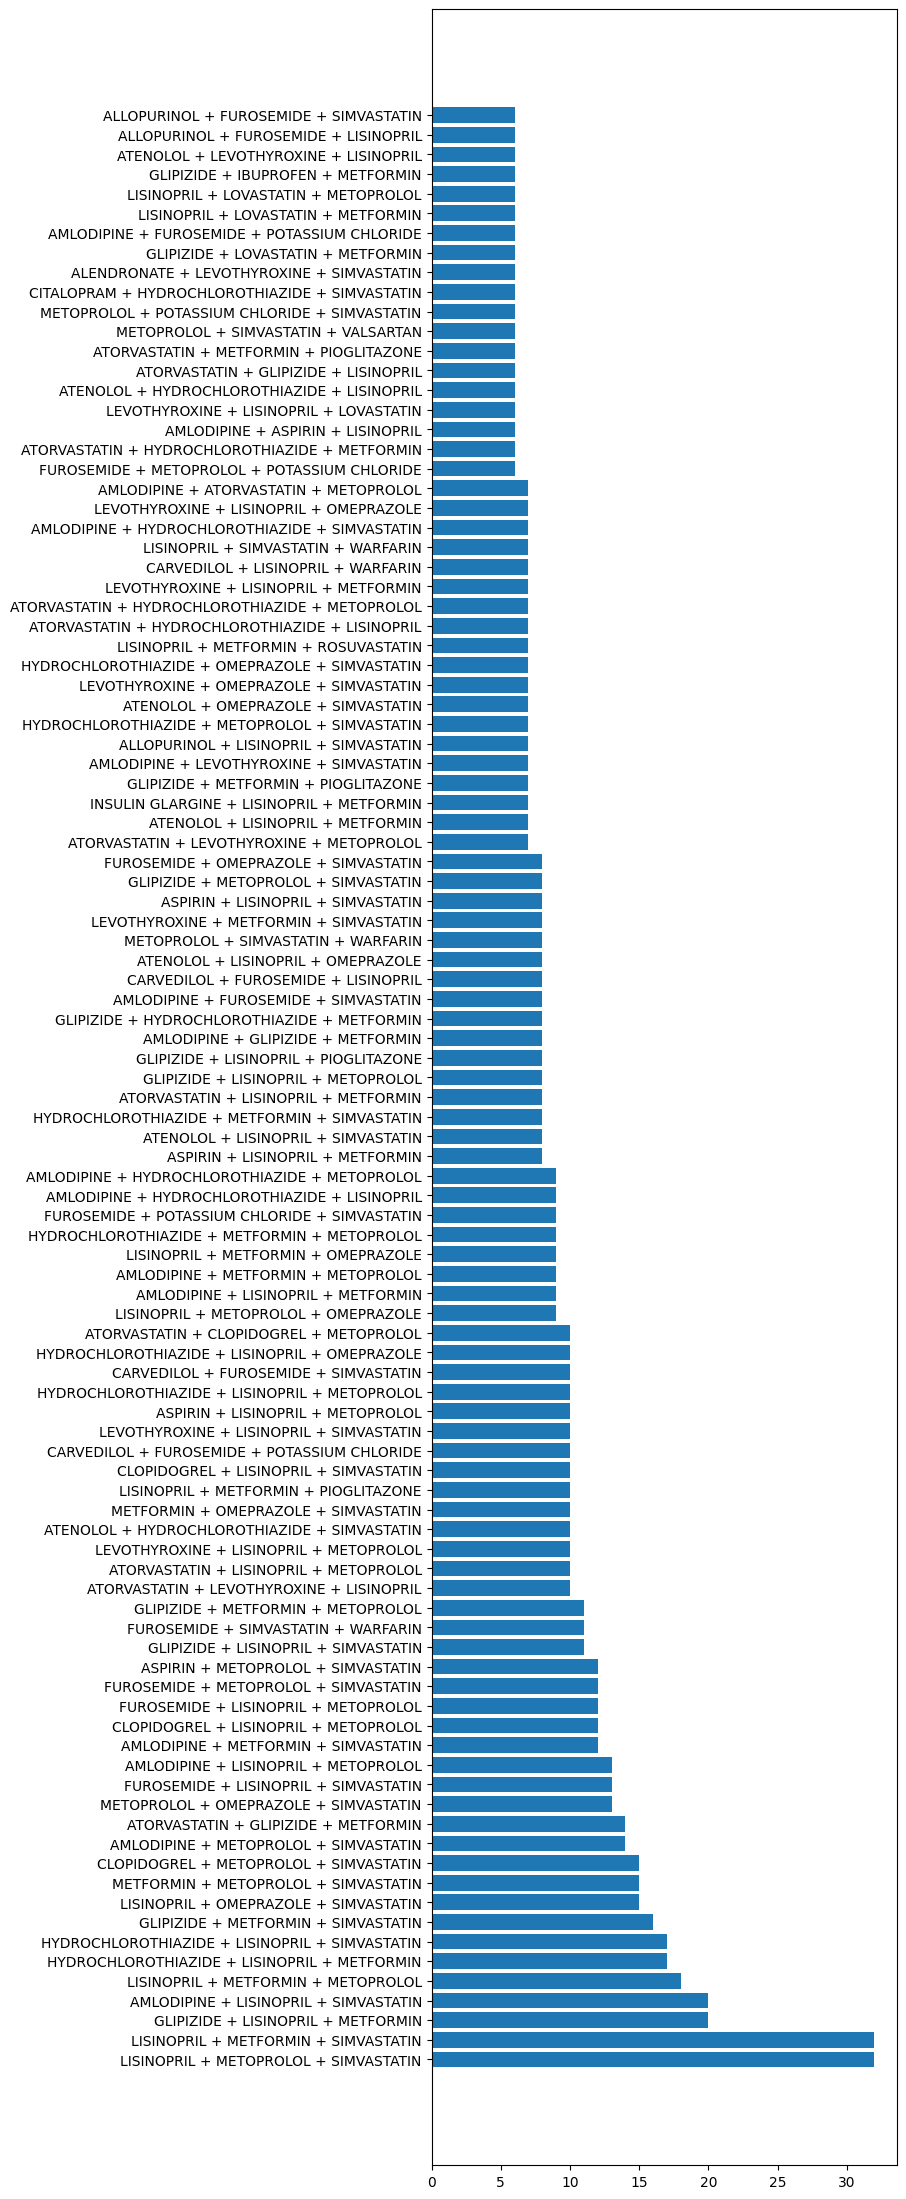

In [177]:
# heatmap, not with pairs, but with 3-drug combinations
heatmap_3 = np.zeros((40, 40, 40))
for combination in data['drug_names'].to_list():
    for drug in combination:
        for drug2 in combination:
            for drug3 in combination:
                heatmap_3[all_40_drugs.index(drug), all_40_drugs.index(drug2), all_40_drugs.index(drug3)] += 1
# diagonal is 0
heatmap_3[range(40), range(40), range(40)] = 0

# bar plot of most frequent 3-drug combinations
drug_triples = Counter()
for combination in data['drug_names'].to_list():
    for triple in combinations(combination, 3):
        drug_triples[triple] += 1
print(drug_triples.__len__())
drug_triples = drug_triples.most_common(100)

# show a bar plot
plt.figure(figsize=(6, 28))
plt.barh([f'{triple[0]} + {triple[1]} + {triple[2]}' for triple, _ in drug_triples], [count for _, count in drug_triples])
plt.show()


### greedy algo for placing. topology: around the 10x10 grid

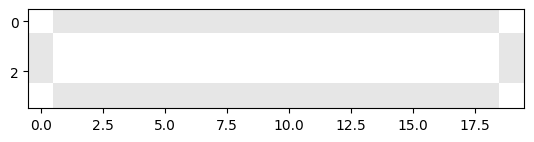

In [50]:
#floor planning based on frequency. topology: square 10x10 grid, each cell is for a mover, drugs are placed around the grid

# Square: (12,12), obdelnik (4, 20)
COORDINATE_X = 4
COORDINATE_Y = 20

floor_plan = np.zeros((COORDINATE_X, COORDINATE_Y), dtype=object)
restricted_area = np.zeros((COORDINATE_X, COORDINATE_Y))
restricted_area[1:COORDINATE_X-1, 1:COORDINATE_Y-1] = 1
restricted_area[[0, 0, -1, -1], [0, -1, -1, 0]] = 1

plt.figure()
plt.imshow(restricted_area, cmap='gray', alpha=0.1)
plt.show()

In [51]:
all_posible_positions = [(i, j) for i in range(COORDINATE_X) for j in range(COORDINATE_Y) if restricted_area[i, j] == 0]
all_posible_positions

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (1, 0),
 (1, 19),
 (2, 0),
 (2, 19),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (3, 10),
 (3, 11),
 (3, 12),
 (3, 13),
 (3, 14),
 (3, 15),
 (3, 16),
 (3, 17),
 (3, 18)]

In [218]:
drug_combinations_for_floor_planning = drug_pairs[:250]

In [219]:
all_posible_positions = [(i, j) for i in range(COORDINATE_X) for j in range(COORDINATE_Y) if restricted_area[i, j] == 0]
all_posible_positions

# place the most frequent 3-drug combinations
for i, (comb, count) in enumerate(drug_combinations_for_floor_planning):
    # find a place for the triple (if the drug is already placed, skip)
    positions = []
    drugs_from_comb_not_placed = [drug for drug in comb if drug not in floor_plan]

    for position in all_posible_positions:
        if floor_plan[position] == 0 and restricted_area[position] == 0:
            positions.append(position)
    
    # find n least distant positions
    if len(positions) < len(drugs_from_comb_not_placed):
        print(f'Not enough space for {comb}')
        continue
    elif len(drugs_from_comb_not_placed) == 0:
        continue
    elif len(comb) == len(drugs_from_comb_not_placed):
        # find n least distant positions
        distances = np.zeros((len(positions), len(positions)))
        for i, pos1 in enumerate(positions):
            for j, pos2 in enumerate(positions):
                if (i == j):
                    distances[i, j] = np.inf
                    continue
                distances[i, j] = np.linalg.norm(np.array(pos1) - np.array(pos2))
        
        min_distance_index = np.unravel_index(np.argmin(distances, axis=None), distances.shape)
        # print(min_distance_index, distances[min_distance_index], positions[min_distance_index[0]], positions[min_distance_index[1]])
        for i, drug in enumerate(drugs_from_comb_not_placed):
            floor_plan[positions[min_distance_index[i]]] = drug
    elif len(comb) > len(drugs_from_comb_not_placed):
        placed_drug = [drug for drug in comb if drug not in drugs_from_comb_not_placed][0]
        position_of_placed_drug = np.where(floor_plan == placed_drug)

        distances_from_placed_to_all = np.zeros(len(positions))
        for i, pos in enumerate(positions):
            distances_from_placed_to_all[i] = np.linalg.norm(np.array(pos) - np.array(position_of_placed_drug))
        min_distance_index = np.argmin(distances_from_placed_to_all)
        floor_plan[positions[min_distance_index]] = drugs_from_comb_not_placed[0]

        # distances_from_placed_to_all 

        # print(position_of_placed_drug, comb, drugs_from_comb_not_placed, distances_from_placed_to_all)

In [1]:
plt.figure()

# plot the floor plan 
plt.imshow(restricted_area, cmap='gray', alpha=0.1)
# floor_plan is a string array with drug names, show it in the plot
for i in range(COORDINATE_X):
    for j in range(COORDINATE_Y):
        if i == 0: 
            # text 90 degrees rotated
            plt.text(j, i, floor_plan[i, j], ha='center', va='bottom', rotation=90)
        elif j == COORDINATE_Y-1:
            plt.text(j, i, floor_plan[i, j], ha='left', va='bottom')
        elif i == COORDINATE_X-1:
            plt.text(j, i, floor_plan[i, j], ha='center', va='top', rotation=90)
        else:
            plt.text(j, i, floor_plan[i, j], ha='right', va='center')
plt.xticks([])
plt.yticks([])
plt.show()

NameError: name 'plt' is not defined

In [ ]:
# clustering
# pymo 
# obdelniky 

# set cover metody - jak pokryt co nejvetsi mnozstvi dat


# количество строев на один препарат заранее брать разделить равномерно по freq. и сделать лекарство А.1 А.2 А.3 и т.д.